In [2]:
import sys
import os


# path = "C:/Users/meide/Documents/GitHub/Master/data"
path = "data/"
os.chdir(path)

In [27]:
gem = "1515"
x_coord = "MolLogP_rank"
y_coord = "charge_rank"

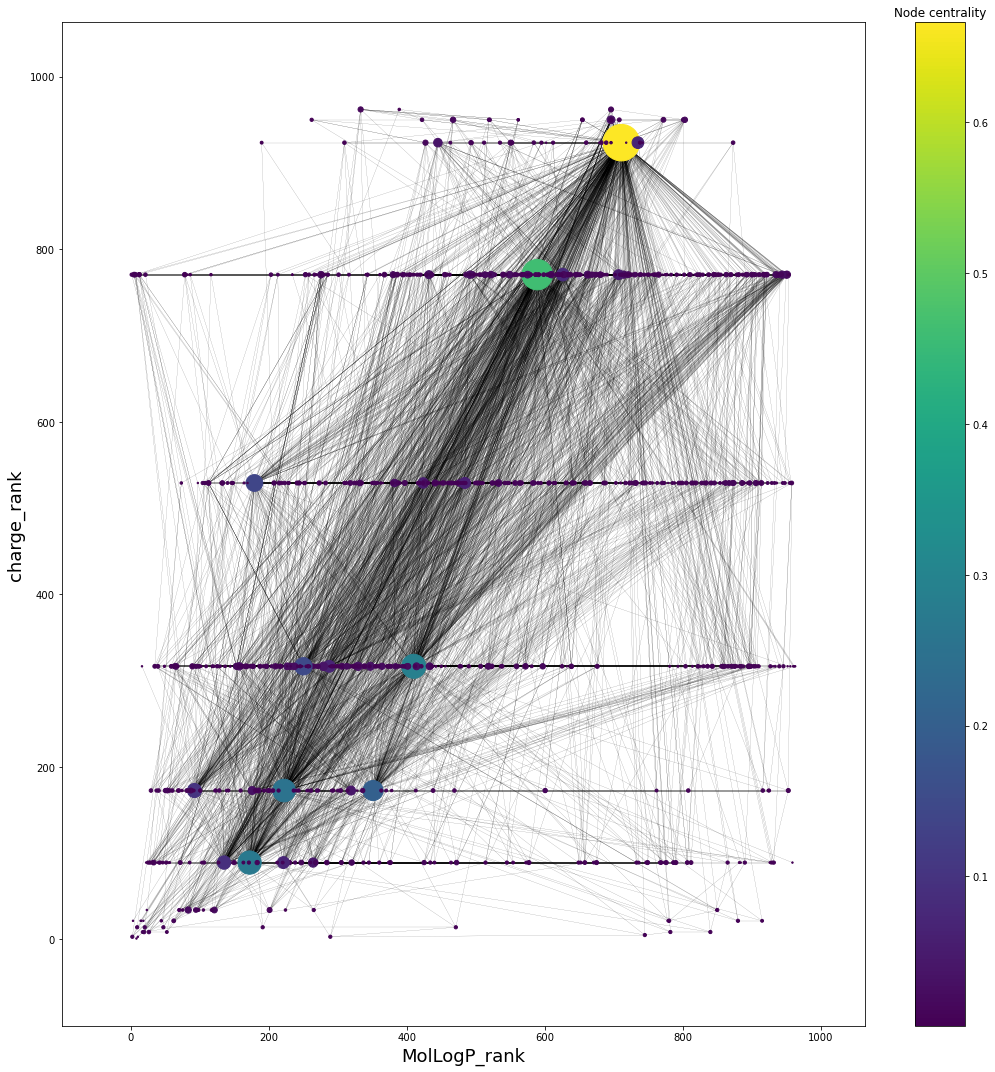

In [29]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_com
import numpy as np
import scipy.sparse
import matplotlib.colors as mcolors
import matplotlib.cm as cm





DescriptorPair = "{}_{}".format(x_coord, y_coord)
file_name = "{gem} + {DescriptorPair}".format(gem = gem, DescriptorPair = DescriptorPair)
fig, ax = plt.subplots(figsize=(15,15))


DriedPeach = pd.read_csv(f"{gem}_edges.csv")



#Genome-scale metabolic network

sources = DriedPeach["BiGG"]
targets = DriedPeach["target"]
coordinates = DriedPeach[[x_coord, y_coord]].values


edge_data = zip(sources,targets, coordinates)

H = nx.DiGraph()

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    H.add_node(src, pos = c)
    H.add_edge(src,dst)

H.remove_edges_from(nx.selfloop_edges(H))

pos_BC_gem = nx.get_node_attributes(H,'pos')

deg_centrality = nx.degree_centrality(H)
cent = np.fromiter(deg_centrality.values(), float)

centrality = np.fromiter(deg_centrality.values(), float)

degree = nx.degree(H)

degree_values = [v for k , v in degree]

degree_values = np.fromiter(degree_values, float)
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = cm.viridis

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)
plt.tight_layout()
cb = plt.colorbar(scalarmappaple)
cb.ax.set_title("Node centrality")



# Draw GEM network
nx.draw_networkx_nodes(H, pos_BC_gem, node_color=centrality, node_size=centrality*2e3)
nx.draw_networkx_edges(H, pos_BC_gem, width = 0.1, arrows = False) #width 0.1 for 1515 and 0.3 for core


limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.tight_layout()

plt.savefig(f"Plots/{gem}_new/{file_name}.png", format="PNG")
plt.show()

In [11]:
DriedPeach.count()

BiGG         372
target       372
MNXM         372
name         372
reference    372
            ... 
PC5          372
PC4          372
PC3          372
PC2          372
PC1          372
Length: 229, dtype: int64